# Linear Regression on Swedish Auto Insurance Dataset
Auto Insurance in Sweden  

In the following data  
X = number of claims  
Y = total payment for all the claims in thousands of Swedish Kronor  
for geographical zones in Sweden  
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance  
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html  

Credits: some materials are borrowed from the following resources
1. https://github.com/RishiSD/Linear-regression-on-Swedish-Auto-Insurance-dataset/blob/master/Swedish%20Auto%20Insurance.ipynb
2. https://github.com/chiphuyen/stanford-tensorflow-tutorials/blob/master/examples/03_linreg_dataset.py

## Step1: Reading data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
df = pd.read_csv('dataset/AutoInsurSweden.txt', sep='\t', skiprows=10, decimal=',')

In [3]:
# let print df or df.head()
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
df[['X', 'Y']] = df[['X', 'Y']].astype('float32')

In [5]:
# Displaying basic stats for the columns
df.describe(include='all')

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351944,87.327553
min,0.000000,0.000000
25%,7.500000,38.849998
50%,14.000000,73.400002
75%,29.000000,140.000000
max,124.000000,422.200012


## Visualization using seaborn and matplotlib
Plotting the distribution of the feature and label from the Dataset.

We can see that the distributions have approximately the same shape which indicates that there is a strong linear relationship between the feature and label.

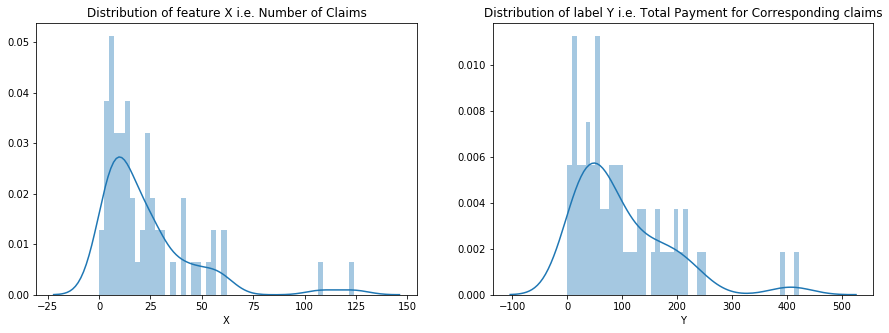

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(df.X,bins=50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(df.Y,bins=50,ax=ax2)

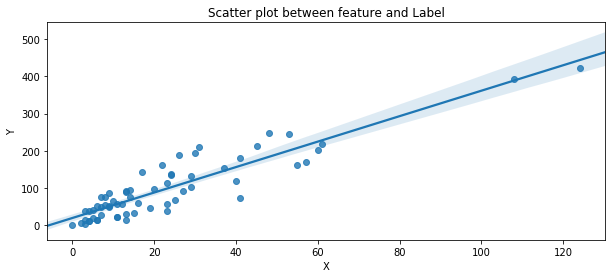

In [7]:
# This displays the scatter plot for Feature and Label and fits an approximate regression line for the same.
fig , (ax1) = plt.subplots(1,1,figsize=(10,4))

ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=df,x='X',y='Y',ax=ax1)

## Step 2: Create Dataset and iterator

In [8]:
import tensorflow as tf

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((df['X'], df['Y']))

In [10]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.float32, tf.float32)>

In [11]:
iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

In [19]:
# Let check if the iterator work
with tf.Session() as sess:
    sess.run(iterator.initializer) # initialize the iterator
    for i in range(10):
        x, y = sess.run((X,Y))
        print(x, y)

108.0 392.5
19.0 46.2
13.0 15.7
124.0 422.2
40.0 119.4
57.0 170.9
23.0 56.9
14.0 77.5
45.0 214.0
10.0 65.3


## Step 3: create weight and bias, initialized to 0

In [12]:
w = tf.get_variable('weights', initializer=tf.constant(0.1))
b = tf.get_variable('bias', initializer=tf.constant(0.1))

## Step 4: build model to predict Y

In [13]:
Y_predicted = X * w + b

## Step 5: use the square error as the loss function

In [14]:
loss = tf.square(Y - Y_predicted, name='loss')

## Step 6: using gradient descent with learning rate of 0.001 to minimize loss

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)

In [16]:
import time
start = time.time()
n_samples = len(df)
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iterator.initializer) # initialize the iterator
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss]) 
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
            
        print('Epoch {0}: {1} - {2}'.format(i, total_loss, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 
    print('w: %f, b: %f' %(w_out, b_out))
print('Took: %f seconds' %(time.time() - start))


Epoch 0: 785280.9503501356 - 12464.776989684691
Epoch 1: 191642.4742552042 - 3041.944035796892
Epoch 2: 191467.95065879822 - 3039.1738199809242
Epoch 3: 191253.14497804642 - 3035.764206000737
Epoch 4: 191039.59429991245 - 3032.374512697023
Epoch 5: 190827.41085216403 - 3029.0065214629212
Epoch 6: 190616.7359856367 - 3025.6624759624874
Epoch 7: 190407.50710499287 - 3022.3413826189344
Epoch 8: 190199.5244270563 - 3019.040070270735
Epoch 9: 189993.15031528473 - 3015.764290718805
Epoch 10: 189787.98412811756 - 3012.5076845732947
Epoch 11: 189584.46336078644 - 3009.277196202959
Epoch 12: 189382.02185094357 - 3006.0638389038663
Epoch 13: 189180.98887050152 - 3002.87283921431
Epoch 14: 188981.36900568008 - 2999.7042699314297
Epoch 15: 188783.133456707 - 2996.557673915984
Epoch 16: 188586.10019779205 - 2993.430161869715
Epoch 17: 188390.42000961304 - 2990.3241271367147
Epoch 18: 188196.13174891472 - 2987.2401864907097
Epoch 19: 188003.0149450302 - 2984.174840397305
Epoch 20: 187811.336779356 -

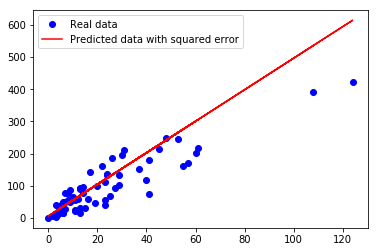

In [17]:
# plot the results
plt.plot(df['X'], df['Y'], 'bo', label='Real data')
plt.plot(df['X'], df['X'] * w_out + b_out, 'r', label='Predicted data with squared error')
# plt.plot(data[:,0], data[:,0] * (-5.883589) + 85.124306, 'g', label='Predicted data with Huber loss')
plt.legend()
plt.show()